In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

# Quantization



In [2]:
def bipolar_quantizer(x, b=8, ref=1):
    return np.clip(np.round((2**b//2)*x/ref), -2**b//2, 2**b//2-1)

def sinlut(b, M):
    t = np.linspace(0, M, M)
    x = (2**b) * np.sin(2*pi*t/M)
    return np.clip(np.round(x), -2**b//2, 2**b//2-1)

def coslut(b, M):
    t = np.linspace(0, M, M)
    x = (2**b) * np.cos(2*pi*t/M)
    return np.clip(np.round(x), -2**b//2, 2**b//2-1)

def adder(x, y):
    return 0

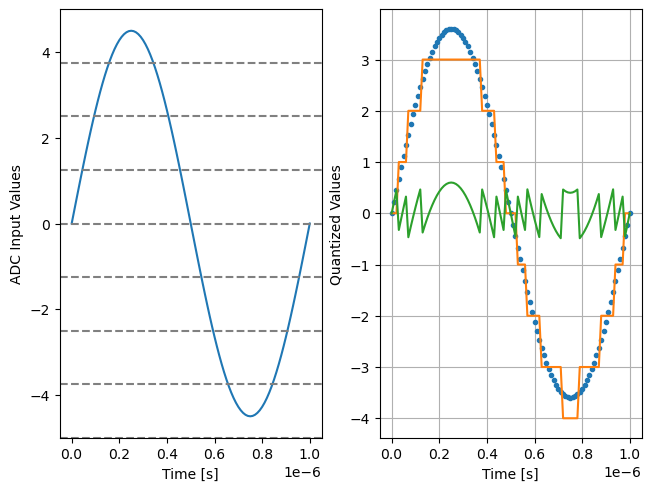

In [48]:
N = 100
fs = 100e6
fc = 1e6
b = 3
a = 4.5
ref = 5

t = np.linspace(0, N/fs, N+1)
x = a * np.sin(2*pi*fc*t)
xq = bipolar_quantizer(x, b=b,ref=ref)

fig, (ax0, ax1) = plt.subplots(1, 2, layout='constrained')
ax0.set_xlabel('Time [s]')
ax0.set_ylabel('ADC Input Values')
ax0.plot(t, x, label='signal')
ax0.set_ylim([-ref,ref])
for i in range(2**b):
    ax0.axhline(y=-ref+2*ref*i/(2**b), linestyle='--', color='gray')


ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Quantized Values')
ax1.plot(t, (2**b//2)*x/ref, '.', label='normalized signal')
ax1.plot(t, xq, label='sampled and quantized signal')
ax1.plot(t, (2**b//2)*x/ref-xq, label='quantization error')
ax1.grid(which='both')

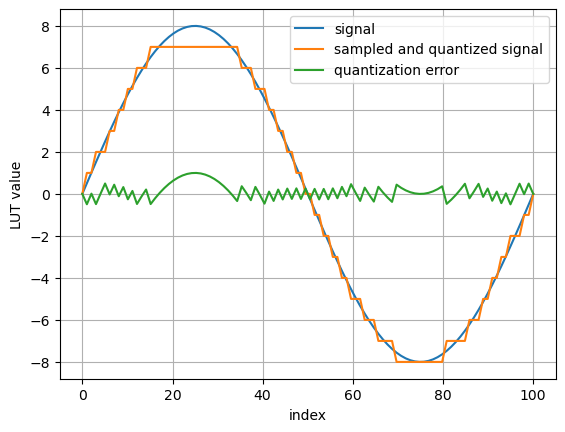

In [135]:
M = 100
b = 4

i = np.linspace(0, M, M)
x = (2**b//2) * np.sin(2*pi*i/M)
xq = np.clip(np.round(x), -2**b//2, 2**b//2-1)

plt.plot(t, x, label='signal')
plt.plot(t, xq, label='sampled and quantized signal')
plt.plot(t, x-xq, label='quantization error')
plt.legend()
plt.grid()
plt.xlabel('index')
plt.ylabel('LUT value')
plt.show()